# Lesson 88: AI in Retail and E-commerce

## Introduction

Welcome to Lesson 88! Today, we explore how Artificial Intelligence is revolutionizing the retail and e-commerce industry. From personalized product recommendations to intelligent inventory management, AI has become an essential tool for modern retailers.

In this lesson, we will cover:
- **Recommendation Systems**: How retailers suggest products to customers
- **Customer Segmentation**: Grouping customers based on behavior and preferences
- **Demand Forecasting**: Predicting future product demand
- **Price Optimization**: Using AI to determine optimal pricing strategies

By the end of this lesson, you will understand the core AI techniques used in retail and be able to implement basic recommendation and segmentation systems.

## Theory

### 1. Recommendation Systems

Recommendation systems are algorithms designed to suggest relevant items to users. There are three main approaches:

**Collaborative Filtering**: Recommends items based on similar users' preferences
- User-based: Find similar users and recommend what they liked
- Item-based: Find similar items to what the user has liked

The similarity between users $u$ and $v$ can be measured using cosine similarity:

$$\text{similarity}(u, v) = \frac{\sum_{i \in I} r_{ui} \cdot r_{vi}}{\sqrt{\sum_{i \in I} r_{ui}^2} \cdot \sqrt{\sum_{i \in I} r_{vi}^2}}$$

where $r_{ui}$ is the rating user $u$ gave to item $i$, and $I$ is the set of items.

**Content-Based Filtering**: Recommends items similar to what the user has liked before based on item features.

**Hybrid Methods**: Combine collaborative and content-based approaches.

### 2. Customer Segmentation

Customer segmentation divides customers into groups with similar characteristics using clustering algorithms like K-Means.

The K-Means objective is to minimize within-cluster variance:

$$\min \sum_{k=1}^{K} \sum_{x_i \in C_k} ||x_i - \mu_k||^2$$

where $C_k$ is cluster $k$, $\mu_k$ is the centroid of cluster $k$, and $x_i$ are data points.

### 3. Demand Forecasting

Demand forecasting predicts future product demand using historical sales data. Common approaches include:
- Time series models (ARIMA, Prophet)
- Machine learning models (Random Forest, Gradient Boosting)

For regression-based forecasting, we minimize:

$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

where $y_i$ is actual demand and $\hat{y}_i$ is predicted demand.

### 4. Price Optimization

Price optimization uses demand elasticity to set prices that maximize revenue:

$$\text{Revenue} = \text{Price} \times \text{Demand}(\text{Price})$$

Price elasticity of demand:

$$E_d = \frac{\partial Q / Q}{\partial P / P}$$

where $Q$ is quantity demanded and $P$ is price.

## Python Implementation

Let's implement some of these AI techniques for retail applications.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics.pairwise import cosine_similarity

# Set random seed for reproducibility
np.random.seed(42)

# Set style for visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

### Customer Segmentation with K-Means

We'll create a synthetic customer dataset and segment customers based on their purchasing behavior.

In [2]:
# Generate synthetic customer data
n_customers = 500

# Customer features: total_spent, purchase_frequency, avg_basket_size, days_since_last_purchase
data = {
    'customer_id': range(1, n_customers + 1),
    'total_spent': np.random.gamma(shape=2, scale=200, size=n_customers),
    'purchase_frequency': np.random.poisson(lam=10, size=n_customers),
    'avg_basket_size': np.random.normal(loc=50, scale=15, size=n_customers),
    'days_since_last_purchase': np.random.exponential(scale=30, size=n_customers)
}

df_customers = pd.DataFrame(data)
df_customers['avg_basket_size'] = df_customers['avg_basket_size'].clip(lower=10)

print("Customer Data Sample:")
print(df_customers.head(10))
print(f"\nDataset shape: {df_customers.shape}")
print(f"\nSummary Statistics:")
print(df_customers.describe())

Customer Data Sample:
   customer_id  total_spent  purchase_frequency  avg_basket_size  \
0            1   478.735878                   7        76.918368   
1            2   298.892946                  10        50.916734   
2            3   276.456717                  11        57.409278   
3            4   276.460459                   8        64.421325   
4            5   929.942882                  11        22.629139   
5            6   573.341246                  11        47.422055   
6            7   226.215600                  14        33.377532   
7            8   493.962895                  12        46.920694   
8            9   399.792053                  13        85.012454   
9           10    43.182989                   6        54.377926   

   days_since_last_purchase  
0                 41.395577  
1                 73.794247  
2                 17.075948  
3                  8.980967  
4                 17.096221  
5                 38.560673  
6                  

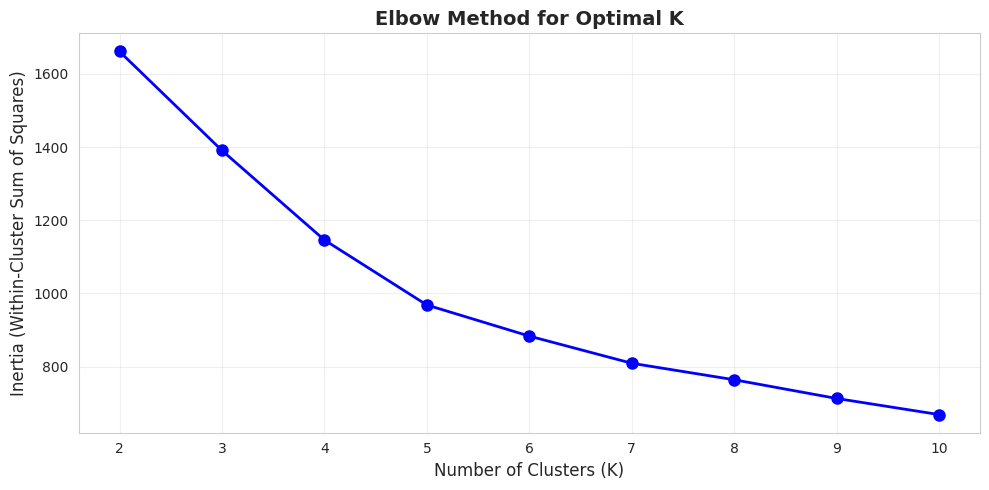

Inertia values for different K:
K=2: 1661.11
K=3: 1390.72
K=4: 1146.13
K=5: 968.53
K=6: 883.55
K=7: 809.33
K=8: 764.24
K=9: 713.15
K=10: 669.11


In [3]:
# Prepare features for clustering
features = ['total_spent', 'purchase_frequency', 'avg_basket_size', 'days_since_last_purchase']
X = df_customers[features].values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters using elbow method
inertias = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 5))
plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
plt.title('Elbow Method for Optimal K', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Inertia values for different K:")
for k, inertia in zip(K_range, inertias):
    print(f"K={k}: {inertia:.2f}")

In [4]:
# Apply K-Means with optimal K (choosing K=4 based on elbow)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_customers['segment'] = kmeans.fit_predict(X_scaled)

# Analyze segments
print("Customer Segments Analysis:\n")
segment_analysis = df_customers.groupby('segment')[features].mean()
print(segment_analysis)

print("\nSegment Sizes:")
print(df_customers['segment'].value_counts().sort_index())

Customer Segments Analysis:

         total_spent  purchase_frequency  avg_basket_size  \
segment                                                     
0         834.352389            9.978261        45.804030   
1         331.615828           10.872727        64.034972   
2         318.620001            9.607143        46.120441   
3         262.138456            9.176471        39.880005   

         days_since_last_purchase  
segment                            
0                       24.230980  
1                       23.084883  
2                       89.507575  
3                       18.996790  

Segment Sizes:
segment
0     92
1    165
2     56
3    187
Name: count, dtype: int64


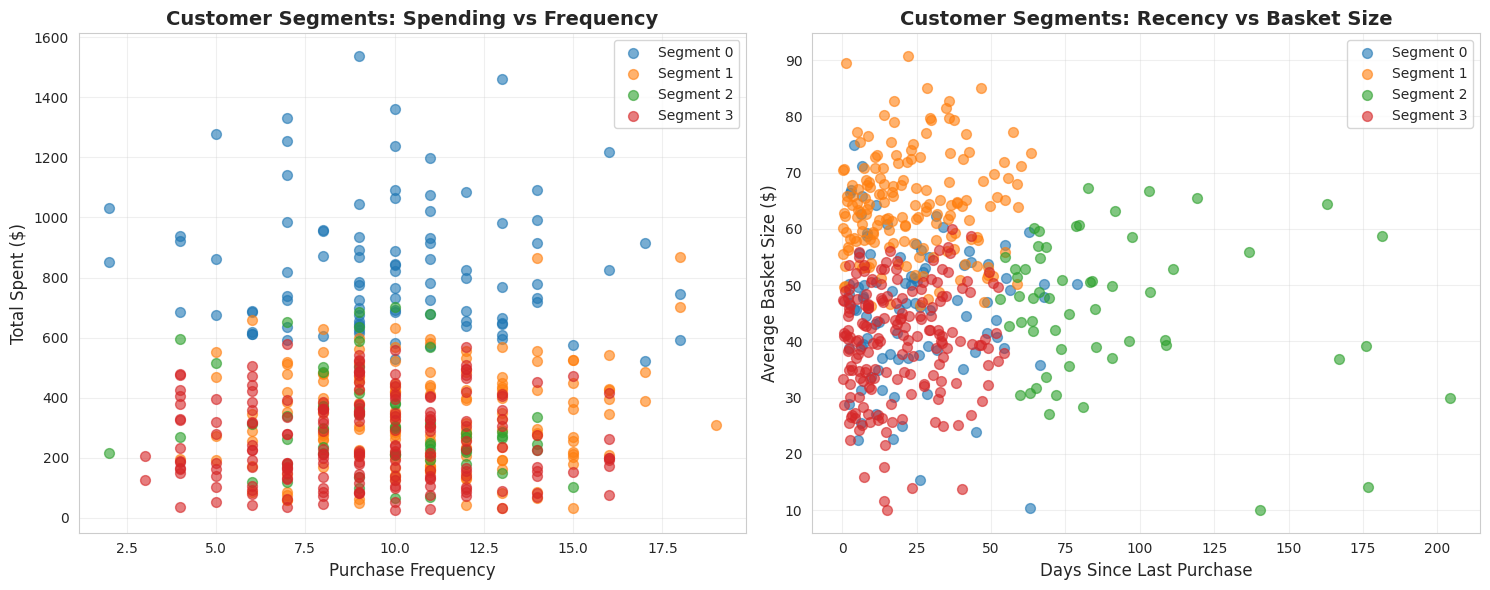

In [5]:
# Visualize customer segments
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot: Total Spent vs Purchase Frequency
for segment in range(optimal_k):
    segment_data = df_customers[df_customers['segment'] == segment]
    axes[0].scatter(segment_data['purchase_frequency'], 
                   segment_data['total_spent'],
                   label=f'Segment {segment}', 
                   alpha=0.6, 
                   s=50)

axes[0].set_xlabel('Purchase Frequency', fontsize=12)
axes[0].set_ylabel('Total Spent ($)', fontsize=12)
axes[0].set_title('Customer Segments: Spending vs Frequency', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Scatter plot: Average Basket Size vs Days Since Last Purchase
for segment in range(optimal_k):
    segment_data = df_customers[df_customers['segment'] == segment]
    axes[1].scatter(segment_data['days_since_last_purchase'], 
                   segment_data['avg_basket_size'],
                   label=f'Segment {segment}', 
                   alpha=0.6, 
                   s=50)

axes[1].set_xlabel('Days Since Last Purchase', fontsize=12)
axes[1].set_ylabel('Average Basket Size ($)', fontsize=12)
axes[1].set_title('Customer Segments: Recency vs Basket Size', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Demand Forecasting with Random Forest

Now let's build a demand forecasting model to predict product sales.

In [6]:
# Generate synthetic sales data
n_days = 365
dates = pd.date_range(start='2023-01-01', periods=n_days, freq='D')

# Create features that influence demand
df_sales = pd.DataFrame({
    'date': dates,
    'day_of_week': dates.dayofweek,
    'day_of_month': dates.day,
    'month': dates.month,
    'is_weekend': (dates.dayofweek >= 5).astype(int),
    'is_holiday': np.random.choice([0, 1], size=n_days, p=[0.95, 0.05]),
})

# Generate demand with patterns
base_demand = 100
trend = np.linspace(0, 20, n_days)  # Growing trend
seasonal = 30 * np.sin(2 * np.pi * df_sales['month'] / 12)  # Seasonal pattern
weekend_effect = df_sales['is_weekend'] * 25  # Weekend boost
holiday_effect = df_sales['is_holiday'] * 50  # Holiday boost
noise = np.random.normal(0, 10, n_days)  # Random noise

df_sales['demand'] = (base_demand + trend + seasonal + 
                      weekend_effect + holiday_effect + noise).clip(lower=0)

print("Sales Data Sample:")
print(df_sales.head(10))
print(f"\nDemand Statistics:")
print(df_sales['demand'].describe())

Sales Data Sample:
        date  day_of_week  day_of_month  month  is_weekend  is_holiday  \
0 2023-01-01            6             1      1           1           0   
1 2023-01-02            0             2      1           0           0   
2 2023-01-03            1             3      1           0           0   
3 2023-01-04            2             4      1           0           0   
4 2023-01-05            3             5      1           0           0   
5 2023-01-06            4             6      1           0           0   
6 2023-01-07            5             7      1           1           0   
7 2023-01-08            6             8      1           1           0   
8 2023-01-09            0             9      1           0           1   
9 2023-01-10            1            10      1           0           0   

       demand  
0  138.590721  
1  114.162604  
2  114.734184  
3   97.852822  
4  130.169162  
5  115.687982  
6  144.759692  
7  149.900113  
8  155.227936  
9  120

In [7]:
# Prepare features and target
feature_cols = ['day_of_week', 'day_of_month', 'month', 'is_weekend', 'is_holiday']
X_demand = df_sales[feature_cols].values
y_demand = df_sales['demand'].values

# Split data (time series: use earlier data for training)
split_idx = int(0.8 * len(df_sales))
X_train, X_test = X_demand[:split_idx], X_demand[split_idx:]
y_train, y_test = y_demand[:split_idx], y_demand[split_idx:]

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Training set size: 292
Test set size: 73


In [8]:
# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, 
                                 max_depth=10, 
                                 random_state=42,
                                 n_jobs=-1)
rf_model.fit(X_train, y_train)

# Make predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Evaluate model
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Model Performance:")
print(f"Training RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Training R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

Model Performance:
Training RMSE: 5.05
Test RMSE: 24.05
Training R²: 0.9630
Test R²: -0.3955

Feature Importance:
        feature  importance
2         month    0.533366
3    is_weekend    0.140745
0   day_of_week    0.139707
4    is_holiday    0.094648
1  day_of_month    0.091533


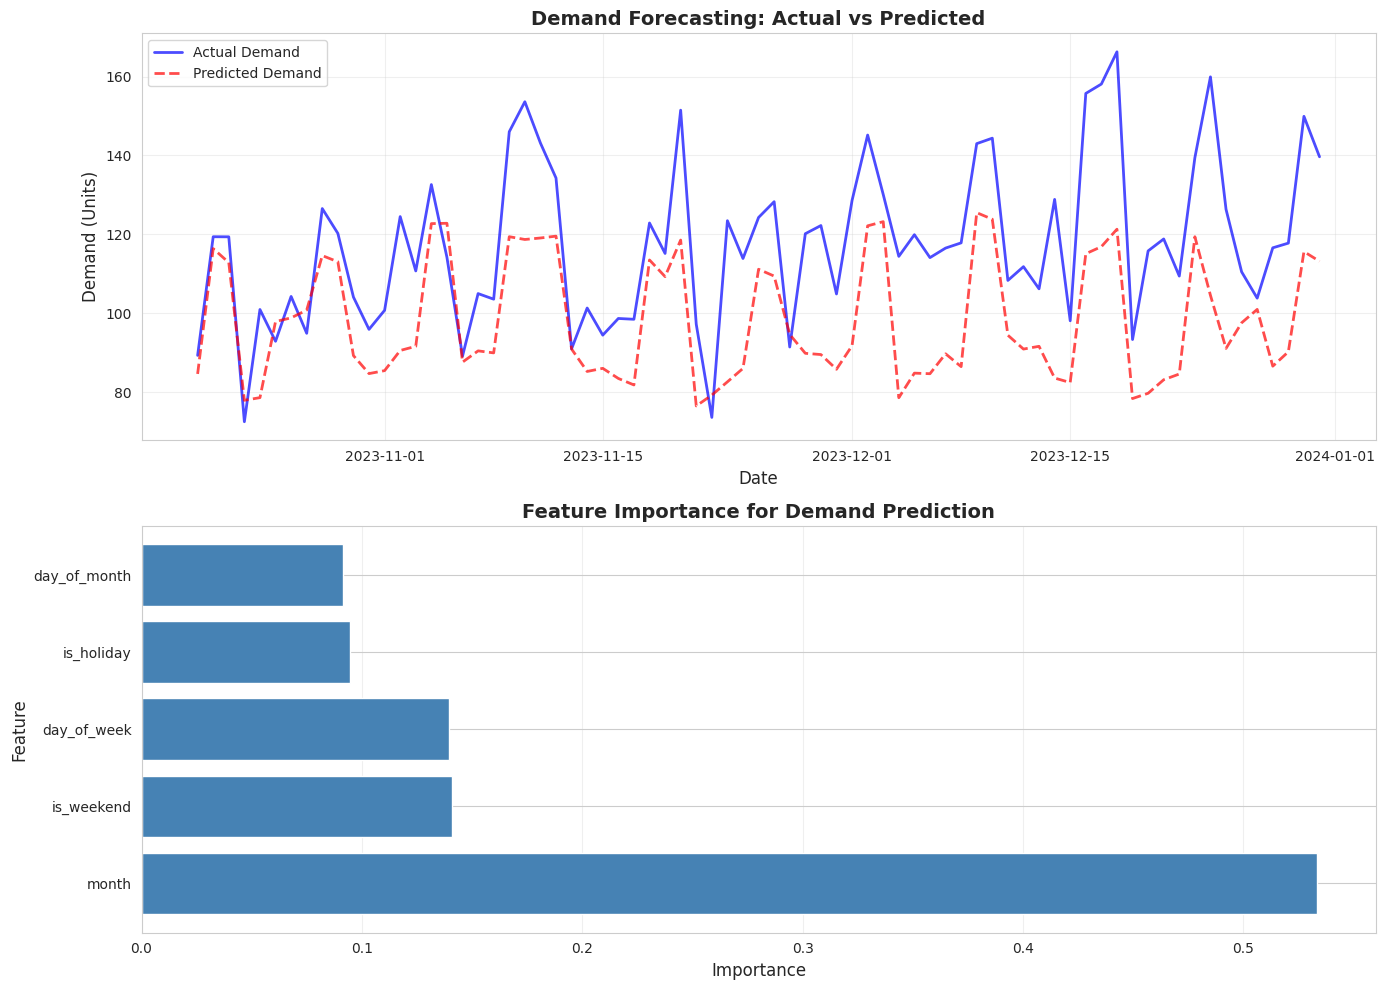

In [9]:
# Visualize demand forecasting results
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Plot actual vs predicted demand
test_dates = df_sales['date'].iloc[split_idx:]
axes[0].plot(test_dates, y_test, 'b-', label='Actual Demand', linewidth=2, alpha=0.7)
axes[0].plot(test_dates, y_test_pred, 'r--', label='Predicted Demand', linewidth=2, alpha=0.7)
axes[0].set_xlabel('Date', fontsize=12)
axes[0].set_ylabel('Demand (Units)', fontsize=12)
axes[0].set_title('Demand Forecasting: Actual vs Predicted', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Plot feature importance
axes[1].barh(feature_importance['feature'], feature_importance['importance'], color='steelblue')
axes[1].set_xlabel('Importance', fontsize=12)
axes[1].set_ylabel('Feature', fontsize=12)
axes[1].set_title('Feature Importance for Demand Prediction', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

### Simple Product Recommendation System

Let's implement a basic collaborative filtering recommendation system.

In [10]:
# Create a user-item rating matrix
n_users = 50
n_products = 20

# Simulate sparse ratings (not all users rate all products)
ratings_matrix = np.zeros((n_users, n_products))

# Fill with some ratings (1-5 stars)
for i in range(n_users):
    # Each user rates 5-12 products
    n_ratings = np.random.randint(5, 13)
    products_rated = np.random.choice(n_products, size=n_ratings, replace=False)
    ratings_matrix[i, products_rated] = np.random.randint(1, 6, size=n_ratings)

print(f"Ratings matrix shape: {ratings_matrix.shape}")
print(f"Sparsity: {(ratings_matrix == 0).sum() / ratings_matrix.size * 100:.1f}%")
print(f"\nSample ratings (first 10 users, first 10 products):")
print(ratings_matrix[:10, :10])

Ratings matrix shape: (50, 20)
Sparsity: 57.3%

Sample ratings (first 10 users, first 10 products):
[[3. 0. 0. 2. 0. 3. 0. 4. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 3. 0.]
 [0. 0. 1. 3. 0. 1. 0. 5. 1. 5.]
 [3. 0. 1. 3. 0. 1. 5. 1. 0. 0.]
 [5. 0. 0. 4. 2. 0. 0. 1. 0. 2.]
 [5. 0. 4. 0. 4. 3. 0. 2. 0. 0.]
 [4. 2. 0. 0. 0. 2. 4. 0. 0. 0.]
 [0. 0. 1. 5. 0. 4. 0. 3. 0. 0.]
 [0. 1. 0. 0. 5. 0. 0. 5. 1. 2.]
 [5. 0. 0. 5. 0. 0. 3. 5. 4. 0.]]


In [11]:
# Calculate user-user similarity using cosine similarity
# Replace zeros with NaN for proper similarity calculation
ratings_for_similarity = ratings_matrix.copy()
ratings_for_similarity[ratings_for_similarity == 0] = np.nan

# Calculate similarity (using original matrix, treating 0 as no rating)
user_similarity = cosine_similarity(ratings_matrix)

# Set diagonal to 0 (user shouldn't be similar to themselves for recommendations)
np.fill_diagonal(user_similarity, 0)

print("User Similarity Matrix (first 5 users):")
print(user_similarity[:5, :5])

# Function to get recommendations for a user
def get_recommendations(user_id, ratings_matrix, user_similarity, n_recommendations=5):
    """
    Get top N product recommendations for a user based on collaborative filtering.
    """
    # Get products not yet rated by the user
    unrated_products = np.where(ratings_matrix[user_id] == 0)[0]
    
    if len(unrated_products) == 0:
        return []  # User has rated all products
    
    # Get top K similar users
    similar_users = np.argsort(user_similarity[user_id])[::-1][:10]
    
    # Predict ratings for unrated products
    predicted_ratings = {}
    
    for product in unrated_products:
        # Find similar users who rated this product
        similar_users_rated = [(sim_user, ratings_matrix[sim_user, product]) 
                               for sim_user in similar_users 
                               if ratings_matrix[sim_user, product] > 0]
        
        if similar_users_rated:
            # Weighted average of ratings
            weighted_sum = sum([user_similarity[user_id, sim_user] * rating 
                               for sim_user, rating in similar_users_rated])
            similarity_sum = sum([user_similarity[user_id, sim_user] 
                                 for sim_user, _ in similar_users_rated])
            
            if similarity_sum > 0:
                predicted_ratings[product] = weighted_sum / similarity_sum
    
    # Sort by predicted rating and return top N
    recommended_products = sorted(predicted_ratings.items(), 
                                 key=lambda x: x[1], 
                                 reverse=True)[:n_recommendations]
    
    return recommended_products

# Test recommendations for a few users
print("\n" + "="*60)
print("PRODUCT RECOMMENDATIONS")
print("="*60)

for test_user in [0, 5, 10]:
    print(f"\nUser {test_user}:")
    print(f"  Products already rated: {np.where(ratings_matrix[test_user] > 0)[0].tolist()}")
    recommendations = get_recommendations(test_user, ratings_matrix, user_similarity, n_recommendations=5)
    print(f"  Top 5 Recommended Products:")
    for product_id, predicted_rating in recommendations:
        print(f"    - Product {product_id}: Predicted Rating = {predicted_rating:.2f}")

User Similarity Matrix (first 5 users):
[[0.         0.18086984 0.49870745 0.47328638 0.33356219]
 [0.18086984 0.         0.45427088 0.29631888 0.40066198]
 [0.49870745 0.45427088 0.         0.35404717 0.63169491]
 [0.47328638 0.29631888 0.35404717 0.         0.37713495]
 [0.33356219 0.40066198 0.63169491 0.37713495 0.        ]]

PRODUCT RECOMMENDATIONS

User 0:
  Products already rated: [0, 3, 5, 7, 13, 15]
  Top 5 Recommended Products:
    - Product 6: Predicted Rating = 3.88
    - Product 14: Predicted Rating = 3.65
    - Product 9: Predicted Rating = 3.56
    - Product 17: Predicted Rating = 3.22
    - Product 11: Predicted Rating = 3.15

User 5:
  Products already rated: [0, 2, 4, 5, 7, 11, 12, 13, 16, 17]
  Top 5 Recommended Products:
    - Product 10: Predicted Rating = 3.37
    - Product 1: Predicted Rating = 3.02
    - Product 6: Predicted Rating = 3.00
    - Product 8: Predicted Rating = 2.87
    - Product 14: Predicted Rating = 2.58

User 10:
  Products already rated: [2, 7,

## Visualization: Complete Picture

Let's create a comprehensive visualization summarizing AI applications in retail.

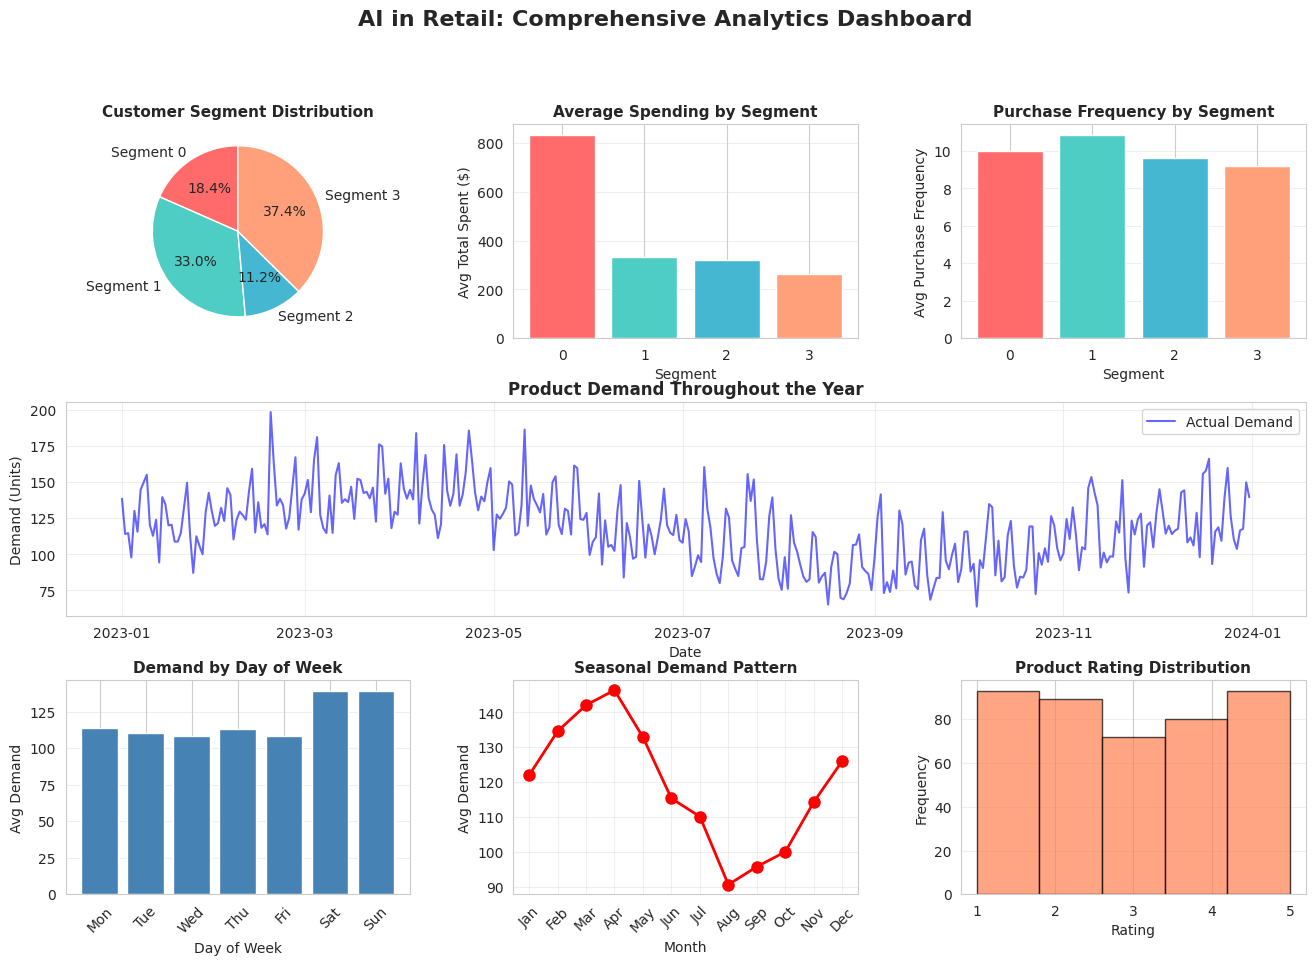

Dashboard created successfully!


In [12]:
# Create a comprehensive dashboard
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Customer Segment Distribution
ax1 = fig.add_subplot(gs[0, 0])
segment_counts = df_customers['segment'].value_counts().sort_index()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']
ax1.pie(segment_counts.values, labels=[f'Segment {i}' for i in range(optimal_k)], 
        autopct='%1.1f%%', colors=colors, startangle=90)
ax1.set_title('Customer Segment Distribution', fontweight='bold', fontsize=11)

# 2. Average spending by segment
ax2 = fig.add_subplot(gs[0, 1])
segment_spending = df_customers.groupby('segment')['total_spent'].mean()
ax2.bar(range(optimal_k), segment_spending.values, color=colors)
ax2.set_xlabel('Segment', fontsize=10)
ax2.set_ylabel('Avg Total Spent ($)', fontsize=10)
ax2.set_title('Average Spending by Segment', fontweight='bold', fontsize=11)
ax2.set_xticks(range(optimal_k))
ax2.grid(True, alpha=0.3, axis='y')

# 3. Purchase frequency by segment
ax3 = fig.add_subplot(gs[0, 2])
segment_frequency = df_customers.groupby('segment')['purchase_frequency'].mean()
ax3.bar(range(optimal_k), segment_frequency.values, color=colors)
ax3.set_xlabel('Segment', fontsize=10)
ax3.set_ylabel('Avg Purchase Frequency', fontsize=10)
ax3.set_title('Purchase Frequency by Segment', fontweight='bold', fontsize=11)
ax3.set_xticks(range(optimal_k))
ax3.grid(True, alpha=0.3, axis='y')

# 4. Demand over time (full year)
ax4 = fig.add_subplot(gs[1, :])
ax4.plot(df_sales['date'], df_sales['demand'], 'b-', alpha=0.6, linewidth=1.5, label='Actual Demand')
ax4.set_xlabel('Date', fontsize=10)
ax4.set_ylabel('Demand (Units)', fontsize=10)
ax4.set_title('Product Demand Throughout the Year', fontweight='bold', fontsize=12)
ax4.legend()
ax4.grid(True, alpha=0.3)

# 5. Demand by day of week
ax5 = fig.add_subplot(gs[2, 0])
demand_by_dow = df_sales.groupby('day_of_week')['demand'].mean()
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax5.bar(range(7), demand_by_dow.values, color='steelblue')
ax5.set_xlabel('Day of Week', fontsize=10)
ax5.set_ylabel('Avg Demand', fontsize=10)
ax5.set_title('Demand by Day of Week', fontweight='bold', fontsize=11)
ax5.set_xticks(range(7))
ax5.set_xticklabels(days, rotation=45)
ax5.grid(True, alpha=0.3, axis='y')

# 6. Demand by month (seasonal pattern)
ax6 = fig.add_subplot(gs[2, 1])
demand_by_month = df_sales.groupby('month')['demand'].mean()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax6.plot(range(1, 13), demand_by_month.values, 'ro-', linewidth=2, markersize=8)
ax6.set_xlabel('Month', fontsize=10)
ax6.set_ylabel('Avg Demand', fontsize=10)
ax6.set_title('Seasonal Demand Pattern', fontweight='bold', fontsize=11)
ax6.set_xticks(range(1, 13))
ax6.set_xticklabels(months, rotation=45)
ax6.grid(True, alpha=0.3)

# 7. Rating distribution
ax7 = fig.add_subplot(gs[2, 2])
all_ratings = ratings_matrix[ratings_matrix > 0]
ax7.hist(all_ratings, bins=5, color='coral', edgecolor='black', alpha=0.7)
ax7.set_xlabel('Rating', fontsize=10)
ax7.set_ylabel('Frequency', fontsize=10)
ax7.set_title('Product Rating Distribution', fontweight='bold', fontsize=11)
ax7.set_xticks([1, 2, 3, 4, 5])
ax7.grid(True, alpha=0.3, axis='y')

fig.suptitle('AI in Retail: Comprehensive Analytics Dashboard', 
             fontsize=16, fontweight='bold', y=0.995)

plt.savefig('retail_ai_dashboard.png', dpi=100, bbox_inches='tight')
plt.show()

print("Dashboard created successfully!")

## Hands-On Activity

### Exercise 1: Improve Customer Segmentation

Try modifying the customer segmentation model:
1. Add a new feature: `customer_lifetime_value` (CLV)
2. Experiment with different values of K (3, 5, 6)
3. Compare the resulting segments

**Hint**: CLV can be calculated as: `total_spent * purchase_frequency / days_since_last_purchase`

In [13]:
# Your code here
# Exercise 1: Improve customer segmentation

# Calculate CLV
df_customers['clv'] = (df_customers['total_spent'] * 
                       df_customers['purchase_frequency'] / 
                       (df_customers['days_since_last_purchase'] + 1))  # Add 1 to avoid division by zero

# Prepare new feature set
features_enhanced = ['total_spent', 'purchase_frequency', 'avg_basket_size', 
                     'days_since_last_purchase', 'clv']
X_enhanced = df_customers[features_enhanced].values
X_enhanced_scaled = scaler.fit_transform(X_enhanced)

# Try K=5
kmeans_enhanced = KMeans(n_clusters=5, random_state=42, n_init=10)
df_customers['segment_enhanced'] = kmeans_enhanced.fit_predict(X_enhanced_scaled)

print("Enhanced Segmentation Results (K=5):")
print(df_customers.groupby('segment_enhanced')[features_enhanced].mean())
print("\nSegment sizes:")
print(df_customers['segment_enhanced'].value_counts().sort_index())

Enhanced Segmentation Results (K=5):
                  total_spent  purchase_frequency  avg_basket_size  \
segment_enhanced                                                     
0                  277.503296            9.120253        37.733975   
1                  328.995054            9.828125        45.057749   
2                  518.053285           12.400000        53.063453   
3                  867.514748            9.789474        48.059742   
4                  302.126274           10.348837        62.383366   

                  days_since_last_purchase          clv  
segment_enhanced                                         
0                                17.548111   269.666299  
1                                85.400090    41.343038  
2                                 2.212332  2236.791806  
3                                25.386898   509.319385  
4                                25.401734   186.588411  

Segment sizes:
segment_enhanced
0    158
1     64
2     30
3     

### Exercise 2: Enhance Demand Forecasting

Improve the demand forecasting model:
1. Add a `price` feature (simulate prices that affect demand)
2. Try a different model (e.g., Gradient Boosting)
3. Compare performance with the Random Forest model

**Hint**: Use `from sklearn.ensemble import GradientBoostingRegressor`

In [14]:
# Your code here
# Exercise 2: Enhance demand forecasting

from sklearn.ensemble import GradientBoostingRegressor

# Add price feature (inversely affects demand)
df_sales['price'] = np.random.uniform(10, 30, n_days)
price_effect = -2 * (df_sales['price'] - df_sales['price'].mean())
df_sales['demand_with_price'] = (df_sales['demand'] + price_effect).clip(lower=0)

# Prepare enhanced features
feature_cols_enhanced = ['day_of_week', 'day_of_month', 'month', 'is_weekend', 'is_holiday', 'price']
X_demand_enhanced = df_sales[feature_cols_enhanced].values
y_demand_enhanced = df_sales['demand_with_price'].values

# Split data
X_train_enh, X_test_enh = X_demand_enhanced[:split_idx], X_demand_enhanced[split_idx:]
y_train_enh, y_test_enh = y_demand_enhanced[:split_idx], y_demand_enhanced[split_idx:]

# Train Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, 
                                     max_depth=5, 
                                     learning_rate=0.1,
                                     random_state=42)
gb_model.fit(X_train_enh, y_train_enh)

# Evaluate
y_test_pred_gb = gb_model.predict(X_test_enh)
test_rmse_gb = np.sqrt(mean_squared_error(y_test_enh, y_test_pred_gb))
test_r2_gb = r2_score(y_test_enh, y_test_pred_gb)

print("Gradient Boosting Model Performance:")
print(f"Test RMSE: {test_rmse_gb:.2f}")
print(f"Test R²: {test_r2_gb:.4f}")
print(f"\nComparison with Random Forest:")
print(f"RF Test RMSE: {test_rmse:.2f}")
print(f"GB Test RMSE: {test_rmse_gb:.2f}")
print(f"Improvement: {((test_rmse - test_rmse_gb) / test_rmse * 100):.2f}%")

Gradient Boosting Model Performance:
Test RMSE: 25.90
Test R²: -0.0298

Comparison with Random Forest:
RF Test RMSE: 24.05
GB Test RMSE: 25.90
Improvement: -7.67%


### Exercise 3: Product Bundling Recommendations

Create a system that recommends product bundles:
1. Find products that are frequently purchased together
2. Use the ratings matrix to identify complementary products
3. Suggest bundles for a given product

**Hint**: Calculate product-product correlation from the ratings matrix

In [15]:
# Your code here
# Exercise 3: Product bundling recommendations

# Calculate product-product similarity (transpose to get products as rows)
product_similarity = cosine_similarity(ratings_matrix.T)
np.fill_diagonal(product_similarity, 0)  # Exclude self-similarity

def recommend_bundle(product_id, product_similarity, n_products=3):
    """
    Recommend products to bundle with the given product.
    """
    similar_products = np.argsort(product_similarity[product_id])[::-1][:n_products]
    similarities = product_similarity[product_id, similar_products]
    return list(zip(similar_products, similarities))

# Test bundling recommendations
print("Product Bundling Recommendations:")
for test_product in [0, 5, 10]:
    bundles = recommend_bundle(test_product, product_similarity, n_products=3)
    print(f"\nProduct {test_product} - Recommended Bundle:")
    for prod_id, similarity in bundles:
        print(f"  - Product {prod_id} (similarity: {similarity:.3f})")

Product Bundling Recommendations:

Product 0 - Recommended Bundle:
  - Product 10 (similarity: 0.540)
  - Product 17 (similarity: 0.510)
  - Product 11 (similarity: 0.481)

Product 5 - Recommended Bundle:
  - Product 4 (similarity: 0.567)
  - Product 14 (similarity: 0.550)
  - Product 7 (similarity: 0.509)

Product 10 - Recommended Bundle:
  - Product 6 (similarity: 0.562)
  - Product 0 (similarity: 0.540)
  - Product 17 (similarity: 0.534)


## Key Takeaways

In this lesson, we explored how AI is transforming retail and e-commerce:

1. **Customer Segmentation**: K-Means clustering helps identify distinct customer groups based on purchasing behavior, enabling targeted marketing strategies.

2. **Demand Forecasting**: Machine learning models like Random Forest can predict future demand using historical data and temporal features, helping optimize inventory management.

3. **Recommendation Systems**: Collaborative filtering enables personalized product recommendations by finding patterns in user behavior and preferences.

4. **Business Impact**: AI applications in retail drive:
   - Increased sales through personalized recommendations
   - Reduced inventory costs through accurate forecasting
   - Improved customer satisfaction through targeted experiences
   - Optimized pricing strategies

5. **Practical Considerations**:
   - Data quality is crucial for accurate predictions
   - Models need regular retraining with new data
   - Cold start problem: new users/products have no historical data
   - Scalability matters for large product catalogs and user bases

6. **Ethical Considerations**:
   - Privacy: Handle customer data responsibly
   - Fairness: Avoid discriminatory pricing or recommendations
   - Transparency: Users should understand why they see certain recommendations

## Further Resources

### Books
- *"Recommendation Systems: The Textbook"* by Charu Aggarwal
- *"Practical Time Series Analysis"* by Aileen Nielsen
- *"Data Science for Business"* by Foster Provost and Tom Fawcett

### Online Courses
- [Recommender Systems Specialization](https://www.coursera.org/specializations/recommender-systems) - University of Minnesota (Coursera)
- [Machine Learning for Retail](https://www.udacity.com/) - Udacity

### Research Papers
- "Amazon.com Recommendations: Item-to-Item Collaborative Filtering" - Linden et al., 2003
- "Matrix Factorization Techniques for Recommender Systems" - Koren et al., 2009
- "Deep Learning for Retail Product Recognition" - Various recent papers on arXiv

### Tools & Libraries
- [Surprise](http://surpriselib.com/) - Python library for recommender systems
- [LightFM](https://github.com/lyst/lightfm) - Hybrid recommendation algorithm
- [Prophet](https://facebook.github.io/prophet/) - Time series forecasting by Facebook
- [Scikit-learn](https://scikit-learn.org/) - Machine learning library

### Industry Case Studies
- [Netflix Recommendation System](https://research.netflix.com/research-area/recommendations)
- [Amazon Personalization](https://aws.amazon.com/personalize/)
- [Alibaba AI in E-commerce](https://damo.alibaba.com/labs/)

### Next Steps
- Explore deep learning approaches for recommendations (Neural Collaborative Filtering)
- Learn about A/B testing for evaluating recommendation systems
- Study multi-armed bandit algorithms for exploration-exploitation in recommendations
- Investigate real-time personalization systems